In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
# import cupy as np
import tensorflow as tf
from tensorflow import keras
from ideal_gas import *
import pickle
from demon3 import trials, N_particles, demon_speed_boundaries, physical_boundaries
font_size = 20

# import tensorflow.experimental.numpy as np
print("Num GPUs Available: {}".format(len(tf.config.experimental.list_physical_devices("GPU"))))
print(tf.test.is_built_with_cuda())
print(tf.version.VERSION)

pygame 2.5.2 (SDL 2.28.3, Python 3.11.7)
Hello from the pygame community. https://www.pygame.org/contribute.html
Num GPUs Available: 0
False
2.16.1


#### Particles on the L Region have a speed less than the demon speed at the physical boundary. Particles on the R Region have a speed greater than or equal to the demon speed at the physical boundary

In [110]:
sims = []
for n in range(0, 6):
    with open("demon_data_piece{}.p".format(n), "rb") as f:
        x = pickle.load(f)
    sims += x
print(len(sims))
print(sims[2900])

3000
[[19, 41], array([7.49796411e+00, 2.26114196e-01, 1.64524357e+00, 5.00409679e+00,
       2.78240807e+00, 2.77937965e+00, 1.23705819e+00, 2.24475065e+00,
       2.90194659e-01, 3.47554781e-15, 5.27153232e-01, 2.31566589e+00,
       4.54695821e-01, 1.16182739e+00, 3.74399683e-01, 2.06718003e+00,
       8.33207333e-01, 1.05101710e+00, 3.78935750e+00, 8.25927501e-01,
       1.55102464e+00, 1.55715783e+00, 6.90336874e-01, 1.14517330e+00,
       6.62759543e-01, 0.00000000e+00, 3.42426784e-01, 2.47504185e+00,
       1.52397692e+00, 1.62078385e+00, 3.94056074e+00, 4.51616848e-01,
       1.78179239e+00, 1.64803961e+00, 5.67612675e+00, 1.53237021e+00,
       3.23938701e-01, 3.23938692e-01, 5.71270595e-01, 1.00874254e-01,
       1.61885503e+00, 3.40480627e-01, 1.03022181e+00, 7.51458120e-01,
       5.14800377e-01, 1.23621269e+00, 1.31627353e+00, 1.01141771e+00,
       8.25935155e-01, 2.10207011e+00, 8.94771187e-01, 8.13487196e-01,
       1.84297189e-01, 2.72238735e+00, 2.66995796e+00, 1.0262

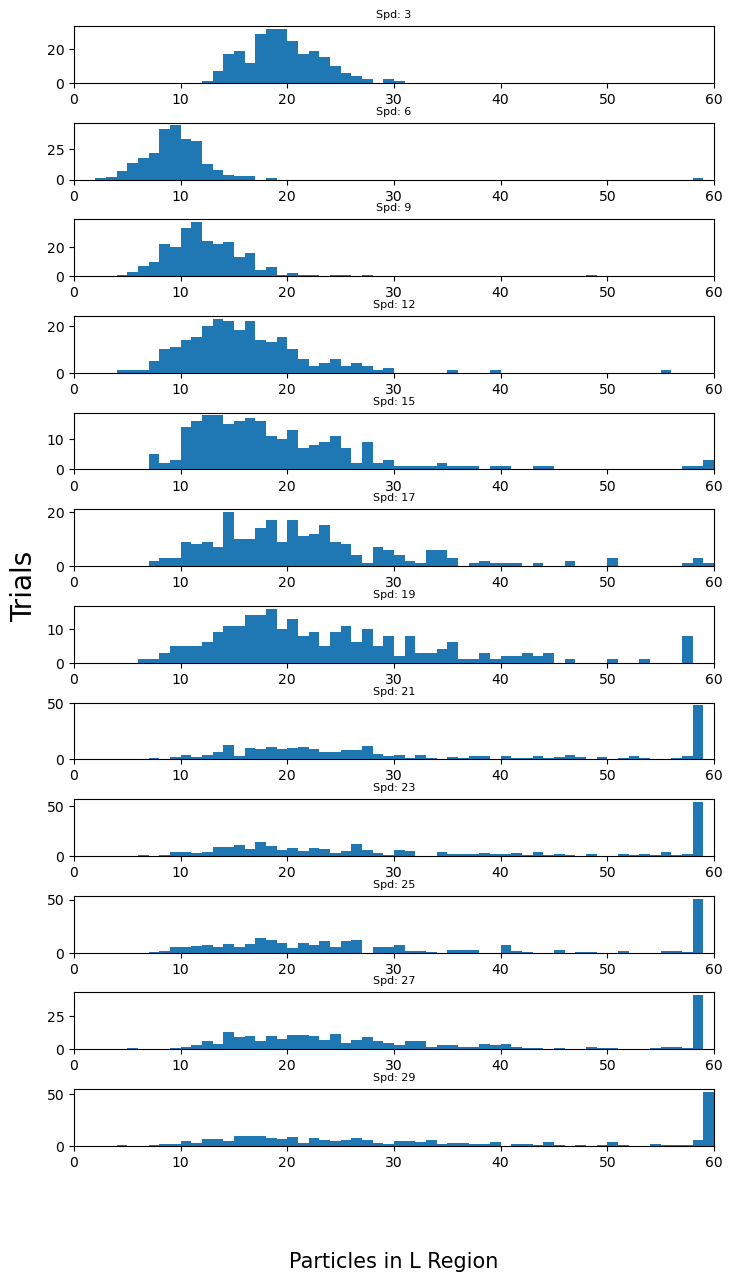

In [181]:
fig, axs = plt.subplots(nrows=len(demon_speed_boundaries), ncols=len(physical_boundaries), 
                        figsize=(8, 14))
# fig. subplots_adjust(hspace=0)
# fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, 
#                     top=0.9, wspace=0.4,hspace=0.9)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.7)

try:
    print(axs.shape[1])
except IndexError as e:
    axs = axs.reshape(len(demon_speed_boundaries), 1)

i = 0 # simulation index
# fig.suptitle('Maxwell Demon: Trials vs. Particles in L Region', fontsize=font_size)

for num1 in range(len(demon_speed_boundaries)):
    for num2 in range(len(physical_boundaries)):
        position_data = np.array([sims[j][0][0] for j in range(i, trials+i)])
        # print(len(position_data))
        i += trials
        bin_heights, bin_borders, _ = axs[num1, num2].hist(position_data, bins=(max(position_data) - min(position_data)), label="histogram")
        # print(len(position_data))
        # axs.set_xticklabels(bin_heights, fontsize=20)
        axs[num1, num2].set_xlim([0, N_particles])
        axs[num1, num2].set_title("Spd: {}".format(demon_speed_boundaries[num1], physical_boundaries[num2]), fontsize=8)
        # axs[num1, num2].set_xlabel("Particles in L Region")
        # axs[num1, num2].set_ylabel("Trials")

fig.supxlabel("Particles in L Region", fontsize=15)
fig.supylabel("Trials", fontsize=20)
plt.savefig("demon.png")
plt.show()

In [198]:
k = 1.380649e-23 # boltzmann constant
def maxwell_boltzmann(v, A, B, T):
	f = A/(T**(3/2))*(v**2)*np.exp((B*(v**2))/T)
	return f
print(N_particles)

60


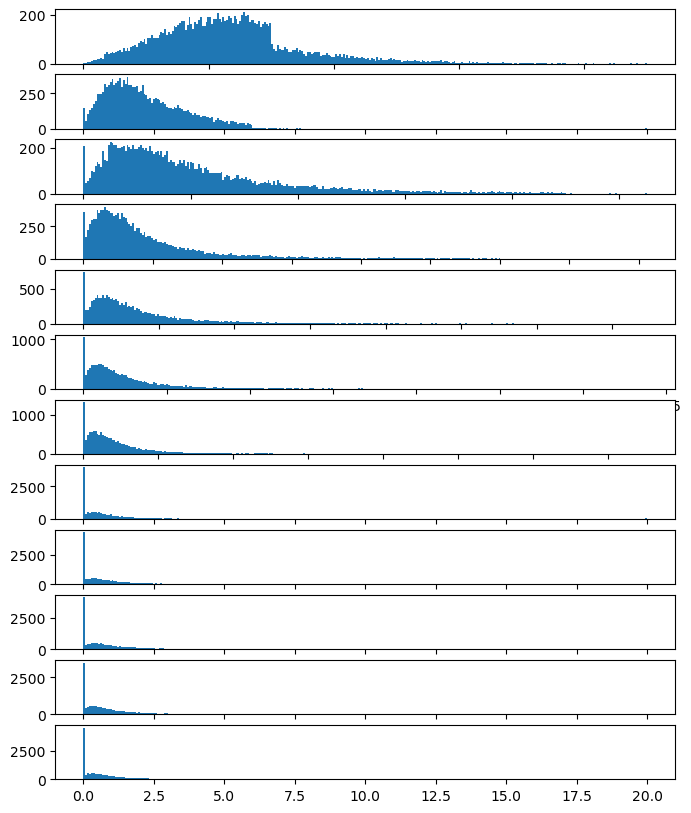

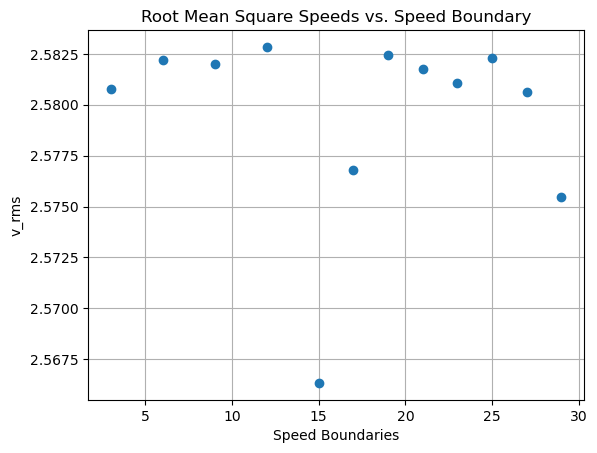

In [202]:
n = 1
bin = 300
T = []
v1 = []
v2 = []
fig, axs = plt.subplots(nrows=len(demon_speed_boundaries), ncols=n, figsize=(8, 10))
axs = axs.reshape(len(demon_speed_boundaries), 1)
# print(axs.shape)

i = 0
for num1 in range(len(demon_speed_boundaries)):
    for num2 in range(n):
        speed_list = []
        for j in range(trials):
            speed = list(sims[i+j][1])
            speed_list += speed
        i += trials
        
        speed_list = np.array(speed_list)
        bin_heights, bin_borders, _ = axs[num1, num2].hist(speed_list, bins=bin)
        bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
        # axs[num1, num2].plot(bin_centers, bin_heights, ".")

        histogram_speeds = []
        for k in range(len(bin_centers)):
            # print(bin_centers[k], bin_heights[k])
            temp = [bin_centers[k] for l in range(int(bin_heights[k]))]
            histogram_speeds += temp
        histogram_speeds = np.array(histogram_speeds)
        
        
        vrms = np.sqrt((np.sum(histogram_speeds**2)/len(histogram_speeds)))
        vavg = np.sum(histogram_speeds)/len(histogram_speeds)
        v1.append(vrms)
        v2.append(vavg)
        # print(vavg)
        # temp = 
        # print(temp)
        T.append(vrms**2/k/3)
plt.savefig("demon_speeds.png")
        # print
        # print(T)
        # try:
        #     popt, _ = curve_fit(maxwell_boltzmann, bin_centers, bin_heights, maxfev=50000) # educated guess
        #     axs[num1, num2].plot(bin_centers, maxwell_boltzmann(bin_centers, *popt))
        # except RuntimeError as e:
        #     print(e)
        # axs[num1, num2].set_xlim([0, 4])

plt.figure()
plt.xlabel("Speed Boundaries")
plt.ylabel("v_rms")
plt.title("Root Mean Square Speeds vs. Speed Boundary")
plt.grid()
plt.plot(demon_speed_boundaries, v1, "o")
plt.savefig("vrms.png")

# plt.figure()
# plt.xlabel("Temperature")
# plt.ylabel("vrms")
# # plt.title("Avera?ge Speeds")
# plt.plot(T, v1, ".")

# plt.figure()
# plt.xlabel("Demon Speed Boundary")
# plt.ylabel("Temperature")
# plt.title("Temperature")
# plt.plot(demon_speed_boundaries, T, ".")